# Contribution scores for interesting stark enhancer regions

In [ ]:
import os
import pandas as pd
import numpy as np
import anndata
import crested
import keras

In [17]:
genome_path = "../../../../../../../../eceksi/resources/dmel/no_chr/dm6_nochr_filtered.fa"
adata_multiome_path = "../../../../../../../data/hydrop/fly_embryo/paper_zips/10x_hydropv2_comparisons_data/anndatas/10x_fly_kfolds.h5ad" 
hydrop_models_path = "../../../../../../../data/hydrop/fly_embryo/paper_zips/10x_hydropv2_comparisons_models/hydrop_fly"
multiome_models_path = "../../../../../../../data/hydrop/fly_embryo/paper_zips/10x_hydropv2_comparisons_models/10x_fly"

In [3]:
genome = crested.Genome(genome_path)
crested.register_genome(genome)

2025-03-20T12:12:41.600180+0100 INFO Genome dm6_nochr_filtered registered.


In [4]:
# only need this for the obs_names
adata = anndata.read_h5ad(adata_multiome_path)

In [5]:
adata.obs_names

Index(['Epidermis', 'Fat_body', 'Glia', 'Head_Ectoderm', 'Hemocytes',
       'Hindgut', 'Malpighian_tubule', 'Midgut', 'Midgut_acidification',
       'Neuroblasts', 'Neuronal', 'PNS_sens_neurons', 'Pharnyx',
       'Primordium_all', 'Salivary_gland', 'Somatic_muscles',
       'Tracheal_system', 'Visceral_muscles', 'Yolk',
       'muscle_attachement_Stripe'],
      dtype='object')

## Hydrop

In [7]:
hydrop_models = []
for model in os.listdir(hydrop_models_path):
    hydrop_models.append(keras.models.load_model(os.path.join(hydrop_models_path, model)))

hydrop_single_model = keras.models.load_model(hydrop_single_model_path)

I0000 00:00:1742469222.564325  153512 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38435 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB MIG 3g.40gb, pci bus id: 0000:25:00.0, compute capability: 8.0


In [8]:
region_of_interest = "2L:6075201-6075701"
class_of_interest = "Neuroblasts"
index_of_interest = list(adata.obs_names.get_indexer([class_of_interest]))

2025-03-20T12:19:51.898996+0100 INFO Calculating contribution scores for 1 class(es) and 1 region(s).


Model: 100%|██████████| 10/10 [00:07<00:00,  1.30it/s]


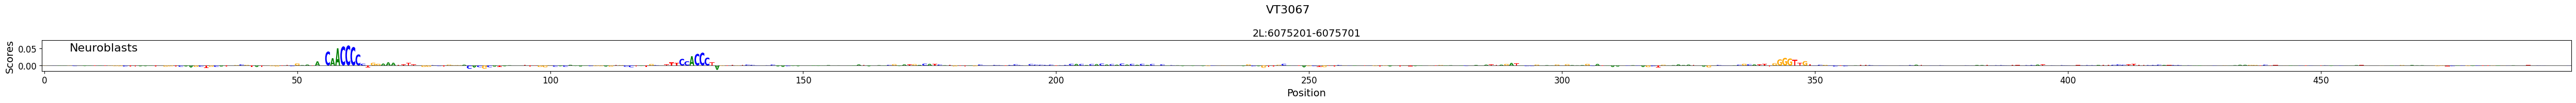

In [12]:
# k folds
scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
    region_of_interest,
    target_idx=index_of_interest,  # None (=all classes), list of target indices, or empty list (='combined' class)
    model=hydrop_models,
    method="expected_integrated_grad",  # default. Other options: "integrated_grad", "mutagenesis"
)

%matplotlib inline
crested.pl.patterns.contribution_scores(
    scores,
    one_hot_encoded_sequences,
    sequence_labels=[region_of_interest],
    class_labels=[class_of_interest],
    title="VT3067",
)

## 10X

In [18]:
multiome_models = []
for model in os.listdir(multiome_models_path):
    multiome_models.append(keras.models.load_model(os.path.join(multiome_models_path, model)))

multiome_single_model = keras.models.load_model(multiome_single_model_path)

2025-03-20T13:08:09.265804+0100 INFO Calculating contribution scores for 1 class(es) and 1 region(s).


Model: 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]


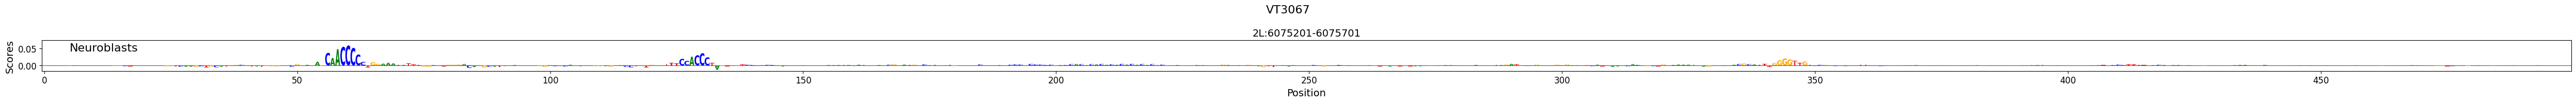

In [21]:
# k folds
scores, one_hot_encoded_sequences = crested.tl.contribution_scores(
    region_of_interest,
    target_idx=index_of_interest,  # None (=all classes), list of target indices, or empty list (='combined' class)
    model=multiome_models,
    method="expected_integrated_grad",  # default. Other options: "integrated_grad", "mutagenesis"
)

%matplotlib inline
crested.pl.patterns.contribution_scores(
    scores,
    one_hot_encoded_sequences,
    sequence_labels=[region_of_interest],
    class_labels=[class_of_interest],
    title="VT3067",
)